### Loading the libraries and the dataset

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('cleaned_text.csv')
df.head()

,Unnamed: 0,file_id,user_id,subforum_id,num_contexts,label,text,text_con_rem,corrected_text,lemma_text
0,0,12834217_1,572066,1346,0,noHate,"As of March 13th , 2014 , the booklet had been...","as of march 13th , 2014 , the booklet had been...",as of march 13th 2014 the booklet had been d...,as of march 13th 2014 the booklet have be ...
1,1,12834217_2,572066,1346,0,noHate,In order to help increase the booklets downloa...,in order to help increase the booklets downloa...,in order to help increase the booklets downloa...,in order to help increase the booklet download...
2,2,12834217_3,572066,1346,0,noHate,( Simply copy and paste the following text int...,( simply copy and paste the following text int...,simply copy and paste the following text into ...,simply copy and paste the follow text into you...
3,3,12834217_4,572066,1346,0,hate,Click below for a FREE download of a colorfull...,click below for a free download of a colorfull...,click below for a free download of a colorfull...,click below for a free download of a colorfull...
4,4,12834217_5,572066,1346,0,noHate,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,click on the `` download ( 7.42 mb ) '' green ...,click on the download 742 mb green banner ...,click on the download 742 mb green bann...


In [3]:
#list(df['text_con_rem'])

In [4]:
df.isnull().sum()

Unnamed: 0         0
file_id            0
user_id            0
subforum_id        0
num_contexts       0
label              0
text               0
text_con_rem      42
corrected_text    48
lemma_text        48
dtype: int64

In [5]:
df.dropna(inplace=True)

### User and Subforum profiling

In [6]:
# Filtering rows involving 'hate speech'
df_hate=df.loc[df['label']=='hate']

print(f'There are a total of {df["user_id"].nunique()} unique users')
print(f'There is a total of {df_hate["user_id"].nunique()} unique users who are involved in hate speech')

There are a total of 2777 unique users
There is a total of 744 unique users who are involved in hate speech


#### Profiling users prone to engaging in hate speech and identifying patterns and trends over time

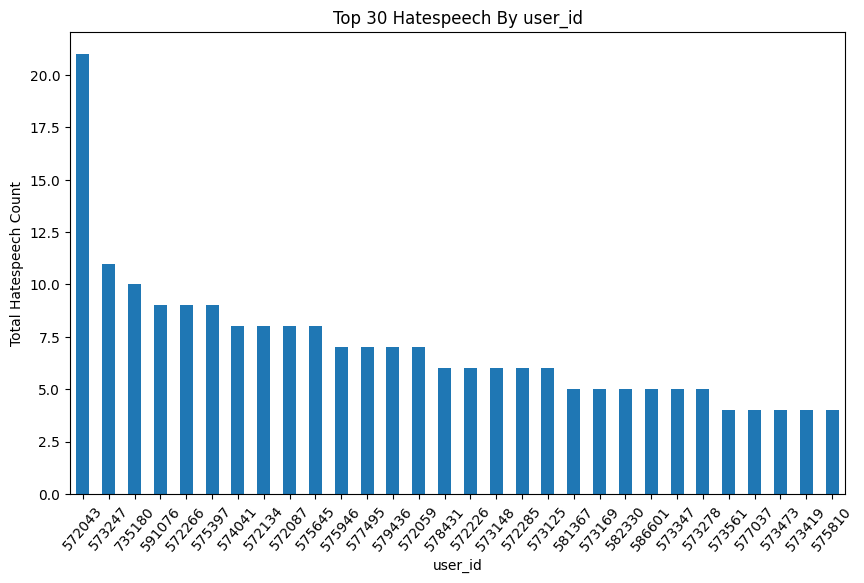

In [7]:
df_hate.groupby(['user_id'])['label'].count().sort_values(ascending=False)[:30].plot(kind='bar', title='Top 30 Hatespeech By user_id',
               ylabel='Total Hatespeech Count', xlabel='user_id', figsize=(10, 6))
plt.xticks(rotation=50)
plt.show()

In [78]:
def user_pattern(*user_id):
    
    
    data_uh=[]      #user hatespeech
    data_uh_idx=[]  #user hatespeech index
    data_unh=[]     #user nohatespeech
    data_unh_idx=[] #user nohatespeech index
    data_hate_count=[]
    k=0
    while k<len(user_id):
        a={'noHate':0,'hate':0}
        df_user=list(df.loc[df['user_id']==user_id[k]]['label'])
        uh=[]
        uh_idx=[]
        unh=[]
        unh_idx=[]
        i=0
        while i<len(df_user):
            if df_user[i]=='noHate':
                a[df_user[i]]+=1
                unh.append(a[df_user[i]])
                unh_idx.append(i)
            else:
                a[df_user[i]]+=1
                uh.append(a[df_user[i]])
                uh_idx.append(i)
            i+=1
        data_uh.append(uh)
        data_uh_idx.append(uh_idx)
        data_unh.append(unh)
        data_unh_idx.append(unh_idx)
        data_hate_count.append(a)
        k+=1
        
    fig, axs = plt.subplots(4, 3, figsize=(15, 10))

    for j, ax in enumerate(axs.flatten()):
        ax.plot(data_uh_idx[j],data_uh[j],color='red',linestyle='',marker='*',markersize=5,label='k')
        ax.plot(data_unh_idx[j],data_unh[j],color='green',linestyle='',marker='.',label='l')
        ax.set_title(f'user_id {user_id[j],data_hate_count[j]}')
        ax.legend(["hate", "nohate"], loc="upper left")
    plt.tight_layout()
    plt.show()

        
        

In [79]:
list(df_hate['user_id'].value_counts().sort_values(ascending=False).index)[:12]

[572043,
 573247,
 735180,
 591076,
 572266,
 575397,
 575645,
 572134,
 574041,
 572087,
 577495,
 572059]

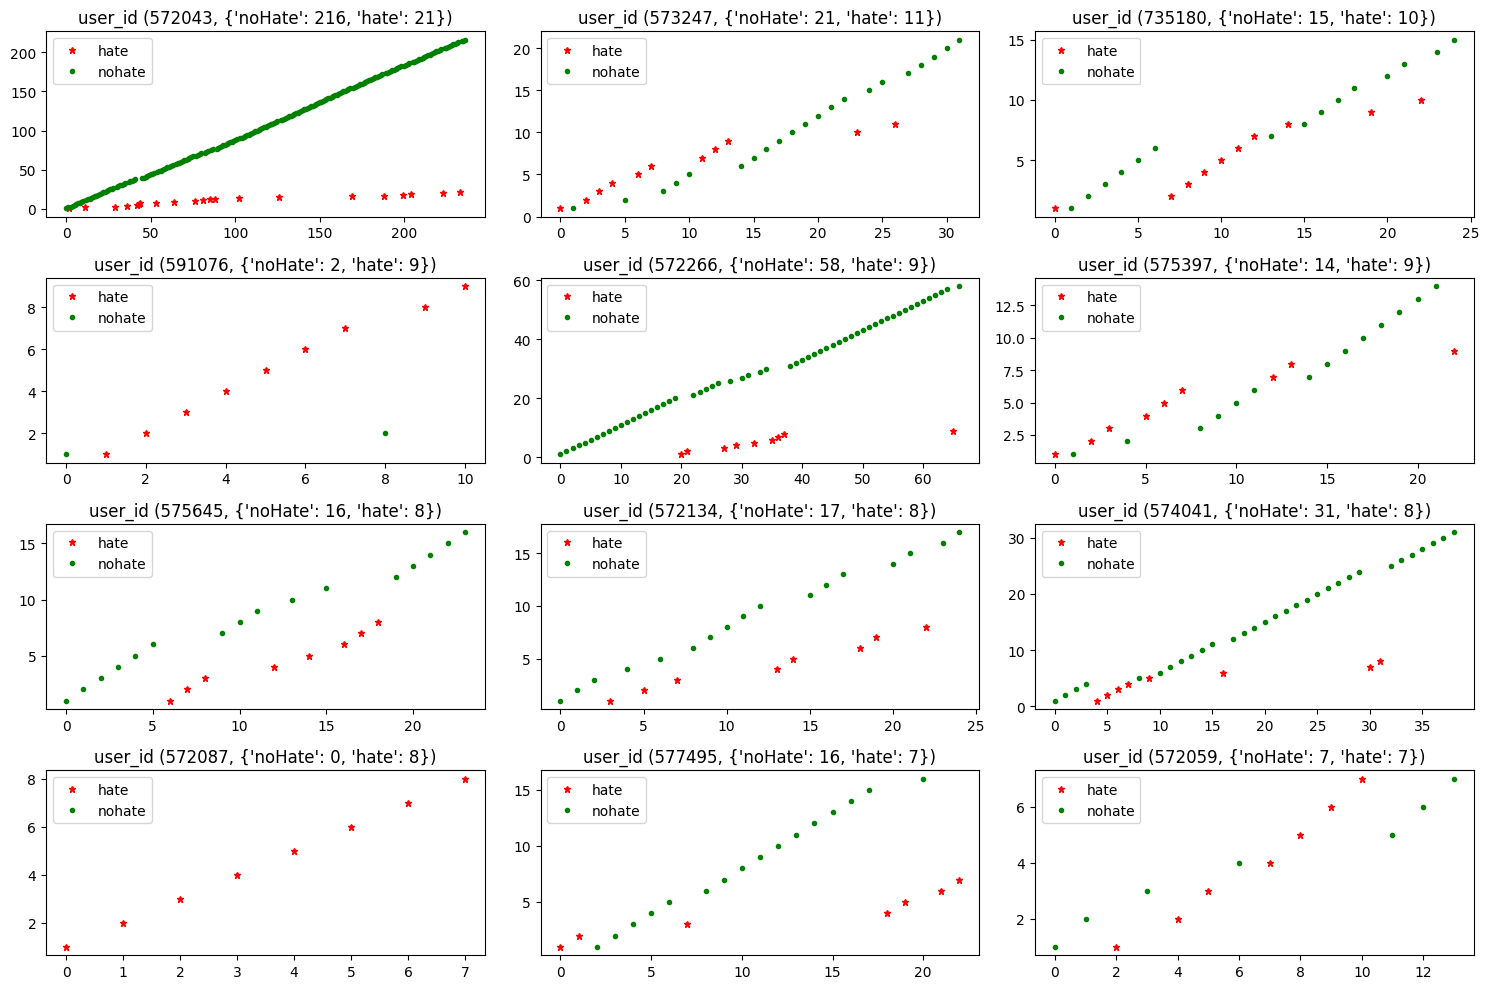

In [80]:
user_pattern(572043,573247,735180,591076,572266,575397,575645,572134,574041,572087,577495,572059)

- User 572043 has the highest hatespeech count, but also has the most non hatespeech count also.
- Users 591076 and 572087 has only spread hatespeech online 

#### Profiling subforums prone to engaging in hate speech and identifying patterns and trends over time

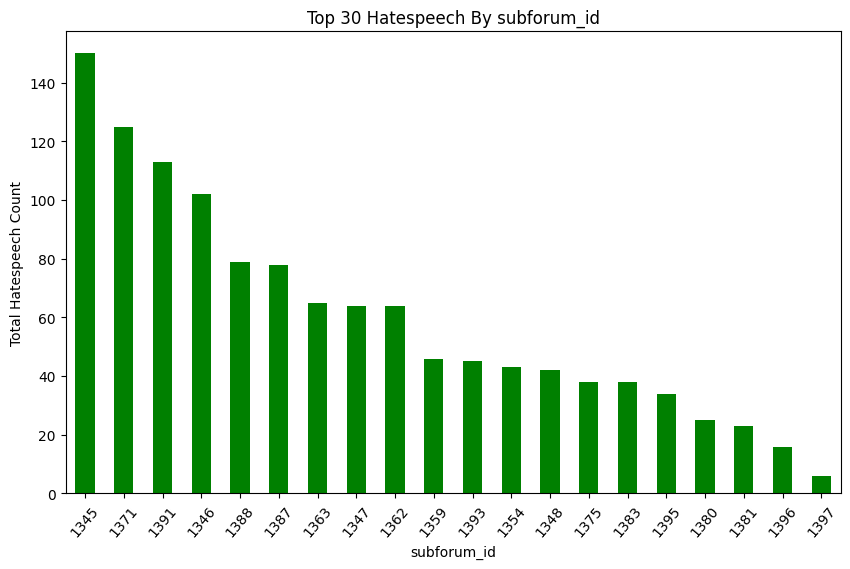

In [11]:
df_hate.groupby(['subforum_id'])['label'].count().sort_values(ascending=False)[:30].plot(kind='bar', title='Top 30 Hatespeech By subforum_id',
               ylabel='Total Hatespeech Count', xlabel='subforum_id', figsize=(10, 6),color='green')
plt.xticks(rotation=50)
plt.show()

#### Visualizing the composition of hate speech by subforum_id 

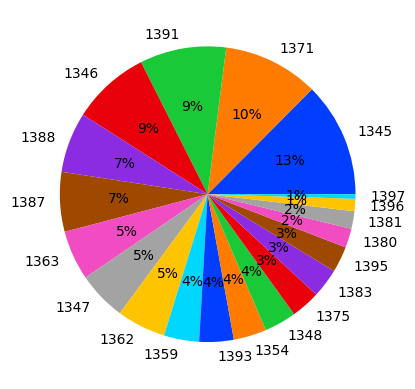

In [12]:
# declaring data 
data = list(df_hate['subforum_id'].value_counts()) 
keys = list(df_hate['subforum_id'].value_counts().index) 
  
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
  
# plotting data on chart 
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%') 
  
# displaying chart 
plt.show()

In [81]:
def subforum_pattern(*subforum_id):
    
    
    data_uh=[]      #user hatespeech
    data_uh_idx=[]  #user hatespeech index
    data_unh=[]     #user nohatespeech
    data_unh_idx=[] #user nohatespeech index
    data_hate_count=[]
    
    k=0
    while k<len(subforum_id):
        a={'noHate':0,'hate':0}
        df_subforum=list(df.loc[df['subforum_id']==subforum_id[k]]['label'])
        uh=[]
        uh_idx=[]
        unh=[]
        unh_idx=[]
        i=0
        while i<len(df_subforum):
            if df_subforum[i]=='noHate':
                a[df_subforum[i]]+=1
                unh.append(a[df_subforum[i]])
                unh_idx.append(i)
            else:
                a[df_subforum[i]]+=1
                uh.append(a[df_subforum[i]])
                uh_idx.append(i)
            i+=1
        data_uh.append(uh)
        data_uh_idx.append(uh_idx)
        data_unh.append(unh)
        data_unh_idx.append(unh_idx)
        data_hate_count.append(a)
        k+=1
        
    fig, axs = plt.subplots(4, 3, figsize=(15, 10))

    for j, ax in enumerate(axs.flatten()):
        ax.plot(data_uh_idx[j],data_uh[j],color='red',linestyle='',marker='*',markersize=5,label='k')
        ax.plot(data_unh_idx[j],data_unh[j],color='green',linestyle='',marker='.',label='l')
        ax.set_title(f'subforum_id {subforum_id[j],data_hate_count[j]}')
        ax.legend(["hate", "nohate"], loc="upper left")
    plt.tight_layout()
    plt.show()

        
        

In [82]:
list(df_hate['subforum_id'].value_counts().sort_values(ascending=False).index)[:12]

[1345, 1371, 1391, 1346, 1388, 1387, 1363, 1347, 1362, 1359, 1393, 1354]

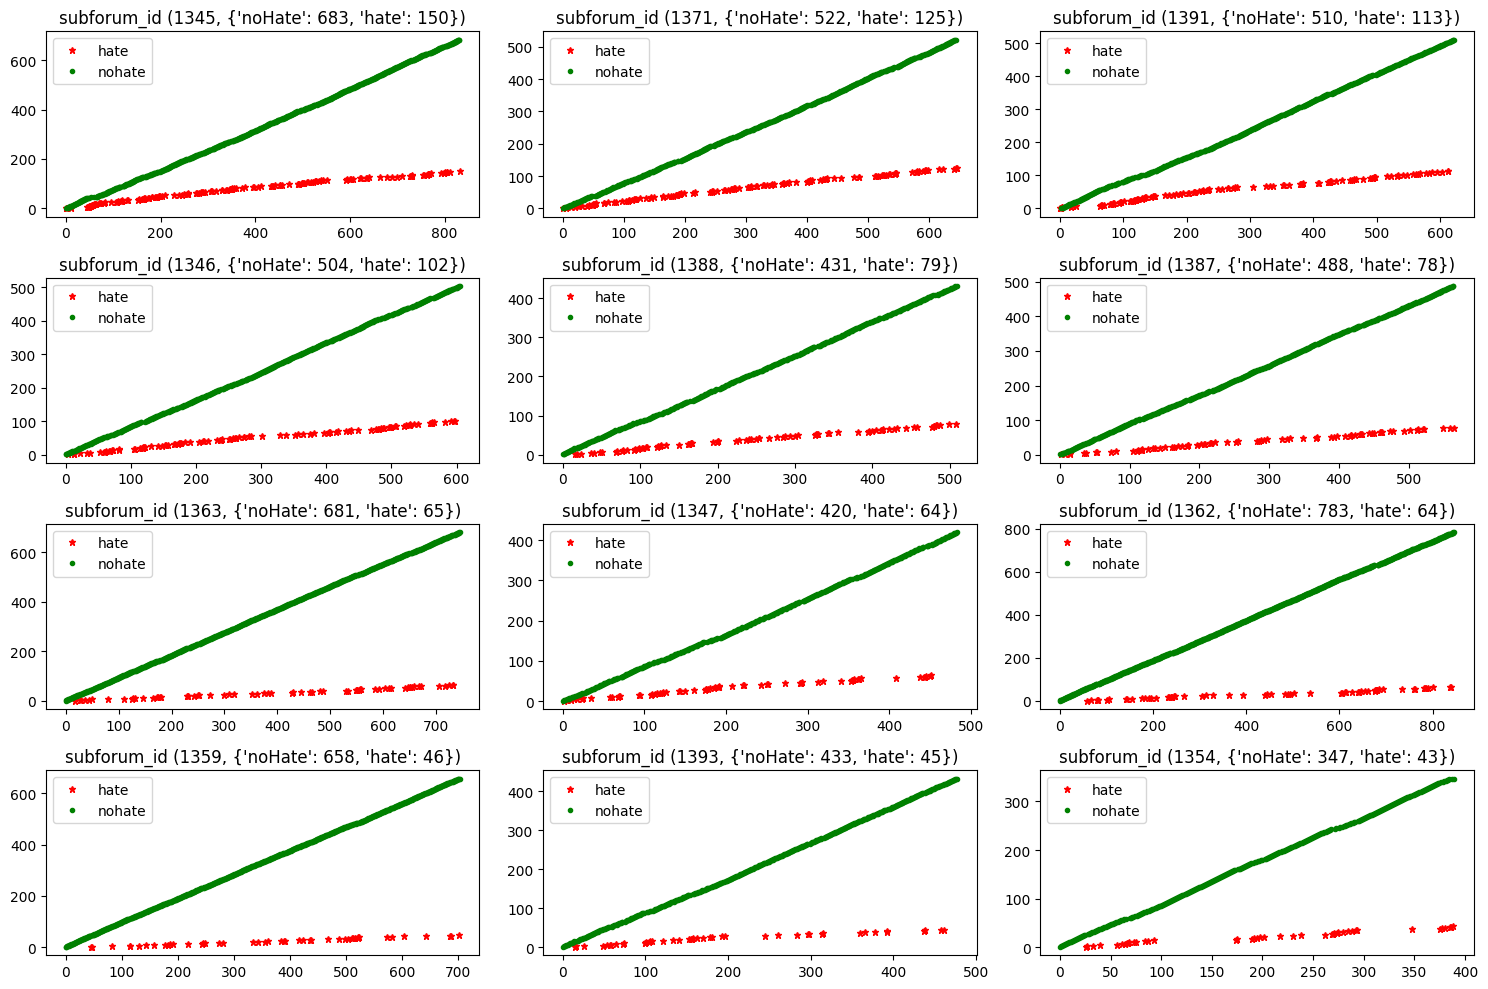

In [83]:
subforum_pattern(1345, 1371, 1391, 1346, 1388, 1387, 1363, 1347, 1362, 1359, 1393, 1354)

### Performing Contextual Analysis

In [16]:
hate_corpus =[text for text in df_hate.corrected_text]

# Create stopword list:
stopwords = set(STOPWORDS)

# Removing stopwords from hate_corpus
x=[]
for i in hate_corpus:
    for j in i.split():
        if j not in stopwords:
            x.append(j)
            
hate_corpus_without_stpw=' '.join(x)


#print ("There are {} words in the combination of all hate texts.".format(len(hate_texts)))
print ("There are {} words in the combination of all hate texts excluding stopwords.".format(len(hate_corpus_without_stpw)))

There are 87235 words in the combination of all hate texts excluding stopwords.


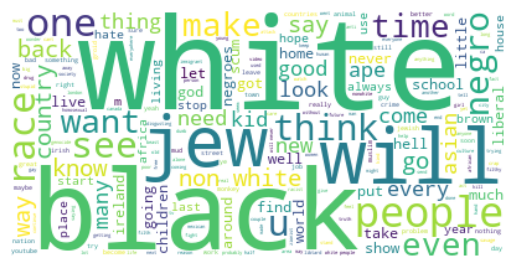

In [17]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(hate_corpus_without_stpw)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [18]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [19]:
words_in_hate_corpus = word_tokenize(hate_corpus_without_stpw)

In [20]:
words_in_hate_corpus[:5]

['click', 'free', 'download', 'colorfully', 'illustrated']

In [21]:
# nltk.pos_tag(words_in_hate_corpus)

### POS tagging and visualization

In [22]:
len(nltk.pos_tag(words_in_hate_corpus))

13187

In [23]:
df_pos=pd.DataFrame(nltk.pos_tag(words_in_hate_corpus),columns=['word', 'pos', ])
df_pos.head()

,word,pos
0,click,JJ
1,free,JJ
2,download,NN
3,colorfully,RB
4,illustrated,VBD


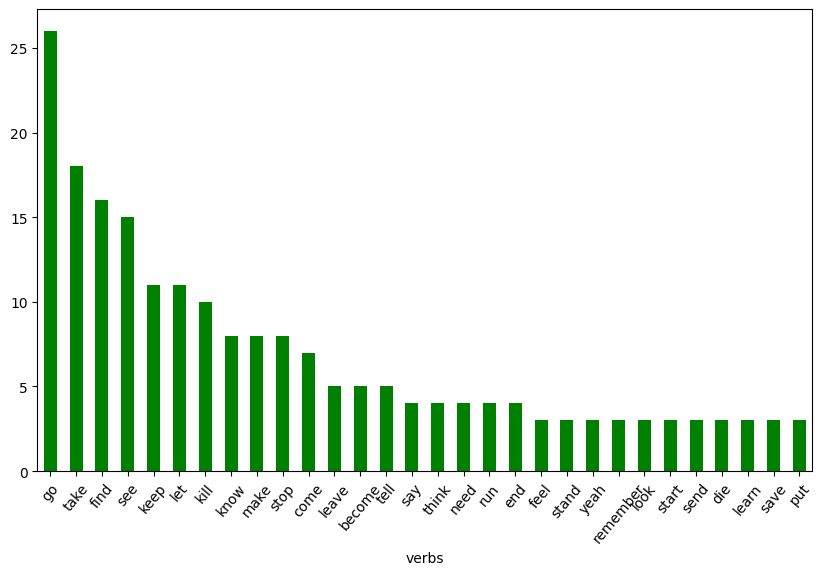

In [24]:
df_pos.loc[df_pos['pos']=='VB']['word'].value_counts()[:30].plot(kind='bar',figsize=(10, 6),color='green')
plt.xticks(rotation=50)
plt.xlabel('verbs')
plt.show()

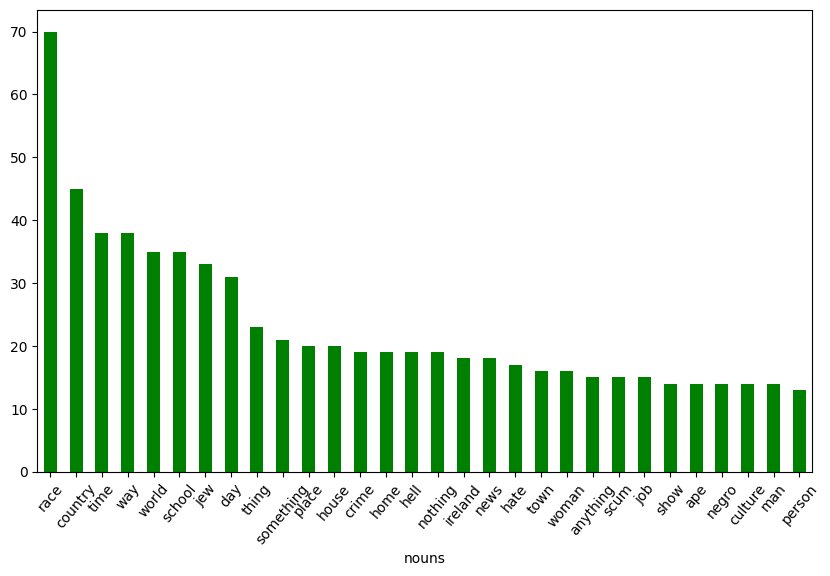

In [25]:
df_pos.loc[df_pos['pos']=='NN']['word'].value_counts()[:30].plot(kind='bar',figsize=(10, 6),color='green')
plt.xticks(rotation=50)
plt.xlabel('nouns')
plt.show()

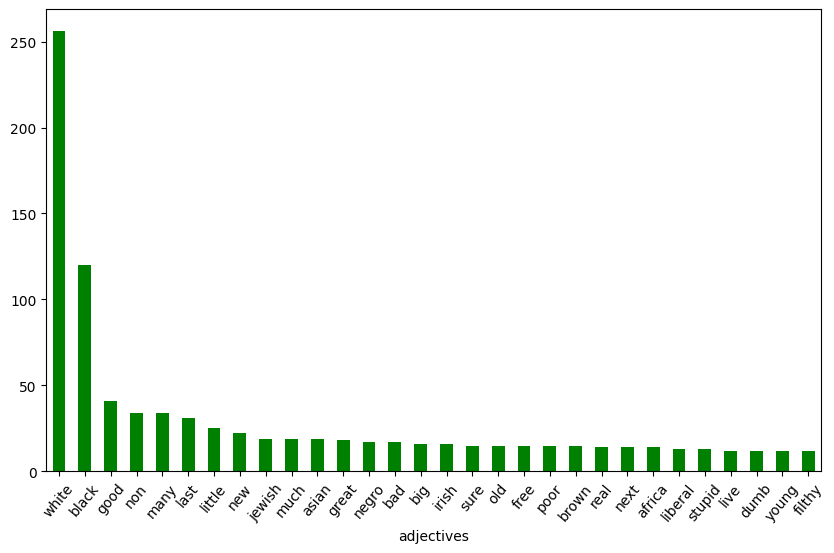

In [26]:
df_pos.loc[df_pos['pos']=='JJ']['word'].value_counts()[:30].plot(kind='bar',figsize=(10, 6),color='green')
plt.xticks(rotation=50)
plt.xlabel('adjectives')
plt.show()

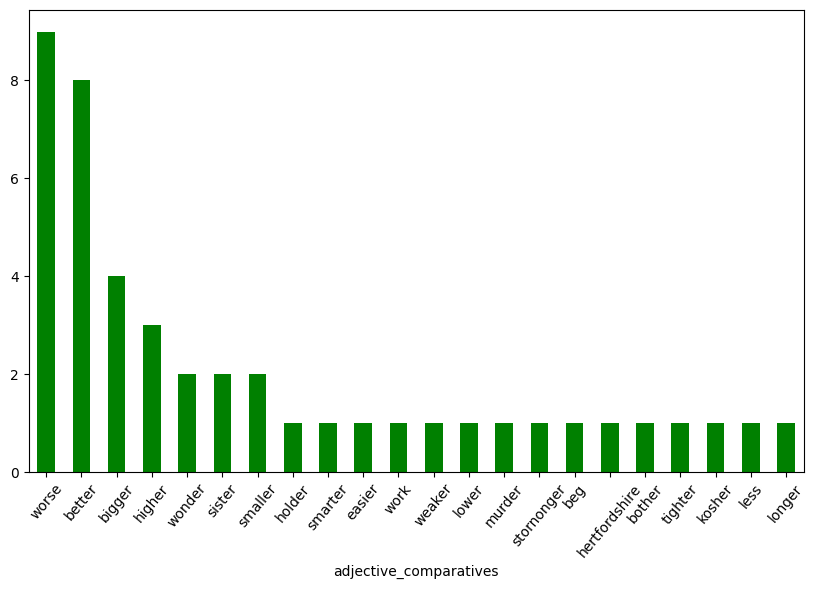

In [27]:
df_pos.loc[df_pos['pos']=='JJR']['word'].value_counts()[:30].plot(kind='bar',figsize=(10, 6),color='green')
plt.xticks(rotation=50)
plt.xlabel('adjective_comparatives')
plt.show()

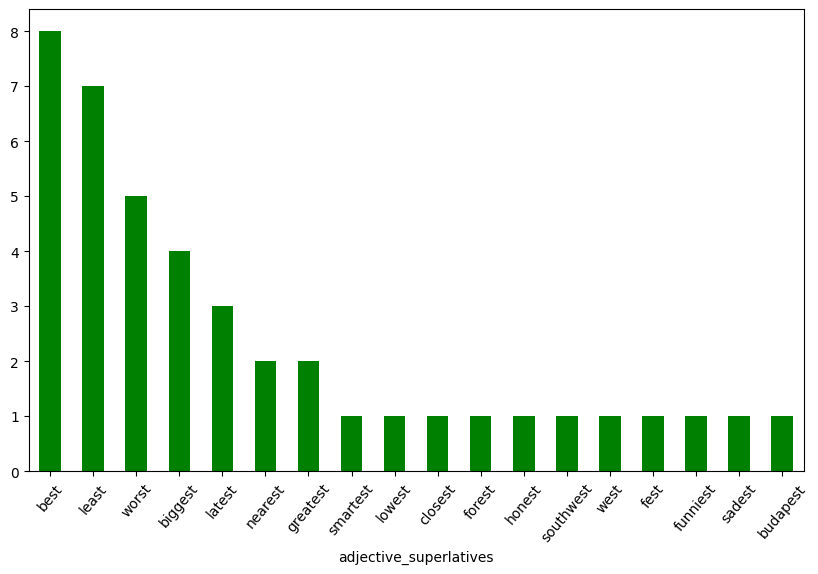

In [28]:
df_pos.loc[df_pos['pos']=='JJS']['word'].value_counts()[:30].plot(kind='bar',figsize=(10, 6),color='green')
plt.xticks(rotation=50)
plt.xlabel('adjective_superlatives')
plt.show()

In [29]:
# nltk.download('tagsets')
# nltk.help.upenn_tagset()


In [30]:
eng_bigrams = nltk.bigrams(words_in_hate_corpus)
#bigrams with length greater than or equal to 5
filtered_bigrams = [ (w1, w2) for w1, w2 in eng_bigrams if len(w1) >=5 and len(w2) >= 5 ]

In [31]:
#After computing bi-grams, the following code computes frequency distribution and displays three most frequent bigrams.
eng_bifreq = nltk.FreqDist(filtered_bigrams)
#Most Common top 3
eng_bifreq.most_common(3)

[(('white', 'people'), 17),
 (('white', 'women'), 11),
 (('south', 'africa'), 10)]

In [32]:
#Now let's see an example which determines the two most frequent words occurring after 'white' are determined.

eng_bigrams = nltk.bigrams(words_in_hate_corpus)
eng_cfd = nltk.ConditionalFreqDist(eng_bigrams)
eng_cfd['kill'].most_common(2)

[('whites', 2), ('one', 2)]

In [33]:
#Now let's define a function named generate, which returns words occurring frequently after a given word.
def generate(cfd, word, n=5):
    n_words = []
    for i in range(n):
             n_words.append(word)
             word = cfd[word].max()
    return n_words    

In [34]:
#Generating Most Frequent Next Word
generate(eng_cfd, 'south')

['south', 'africa', 'way', 'take', 'care']

In [35]:
#A collocation is a pair of words that occur together, very often.
#For example, red wine is a collocation.
#One characteristic of a collocation is that the words in it cannot be substituted with words having similar senses.
#For example, the combination maroon wine sounds odd.

#Generating Collocations:
# from nltk.corpus import genesis
# tokens = genesis.words('english-kjv.txt')
from nltk.text import Text

gen_text = nltk.Text(words_in_hate_corpus)
gen_text.collocations()

non whites; south africa; non white; ghlight sweden; race mixing; gene
pool; sweden ghlight; high school; deanna spingola; dozen tiolets;
white women; eyed stare; glassy eyed; one day; white woman; third
world; white people; clean dozen; kein islam; giving glassy


### Named Entity Recognition

In [36]:
# nltk.download("maxent_ne_chunker")
# nltk.download("words")
# tree = nltk.ne_chunk(nltk.pos_tag(words_in_hate_corpus))

In [40]:
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")

In [41]:
text1= NER(hate_corpus_without_stpw)

In [42]:
ent=[[],[]]
for word in text1.ents:
    ent[0].append(word.text)
    ent[1].append(word.label_)
    
ent_df=pd.DataFrame({'text':ent[0],'label':ent[1]})
ent_df.head()

,text,label
0,132,CARDINAL
1,el paso,ORG
2,texas,GPE
3,scum muslim,NORP
4,millions,CARDINAL


In [43]:
ent_df['label'].unique()

array(['CARDINAL', 'ORG', 'GPE', 'NORP', 'DATE', 'LOC', 'ORDINAL', 'TIME',
       'LANGUAGE', 'PERSON', 'MONEY', 'FAC', 'EVENT', 'QUANTITY',
       'PERCENT'], dtype=object)

In [44]:
def plot(col):
    plt.figure(figsize=(16, 16))
    plt.subplot(3, 1, 1)
    df=pd.DataFrame({spacy.explain(col):[i[0] for i in ent_df.loc[ent_df['label']==col][['text']].value_counts()[:10].index],
                   'Hate Speech Count':list(ent_df.loc[ent_df['label']==col][['text']].value_counts()[:10].values)})
    sns.barplot(data=df,x=spacy.explain(col),y='Hate Speech Count',)
    #plt.xticks([250, 500, 750, 1000, 1393, 1584, 1731])
    plt.xticks(fontsize=15,rotation=45)
    plt.yticks(fontsize=15)
    plt.xlabel(spacy.explain(col), fontsize=18,color='green')
    plt.ylabel('Hate Speech Count', fontsize=18,color='red')
    #plt.title('employee income', fontsize=30)
    plt.show()
    print('..............................................................................................................')



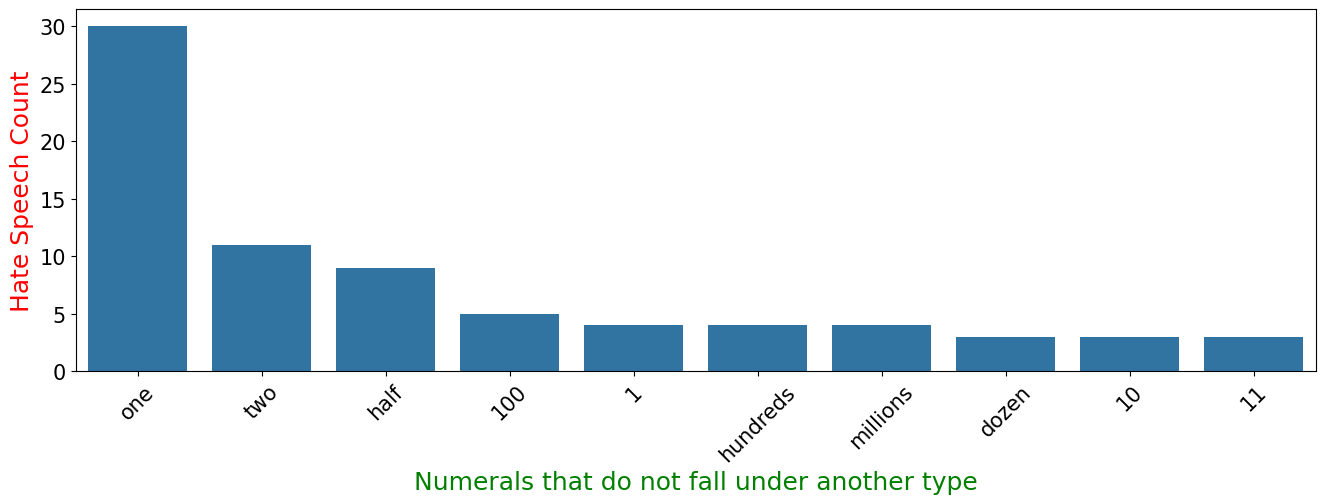

..............................................................................................................


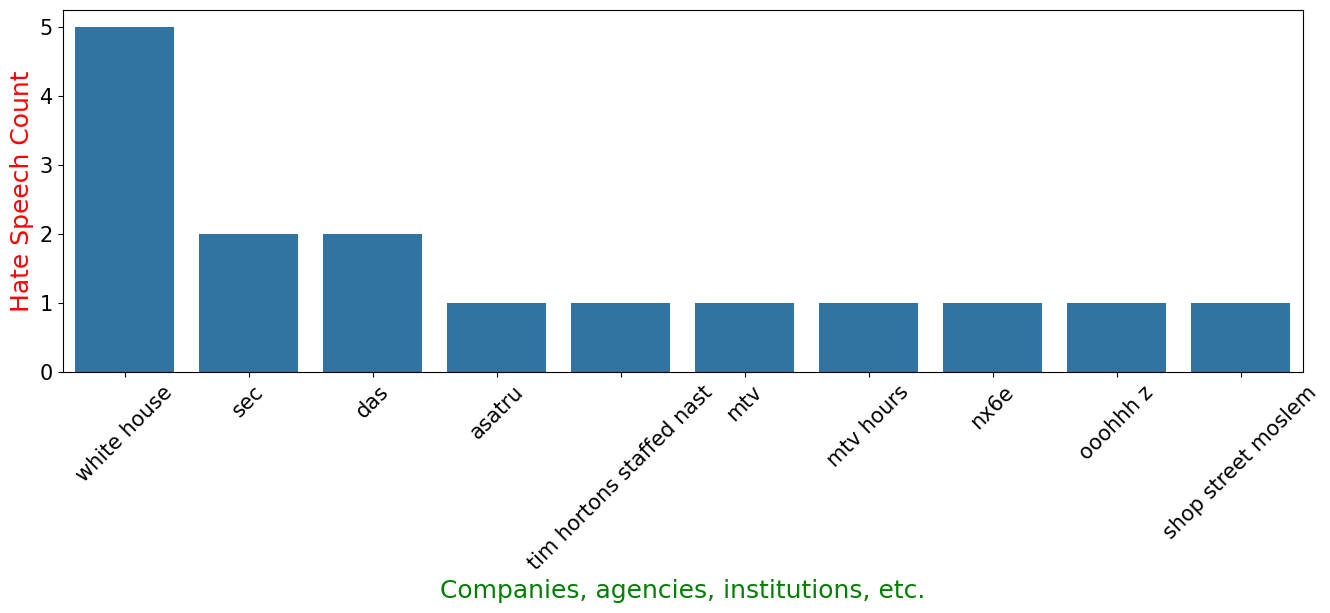

..............................................................................................................


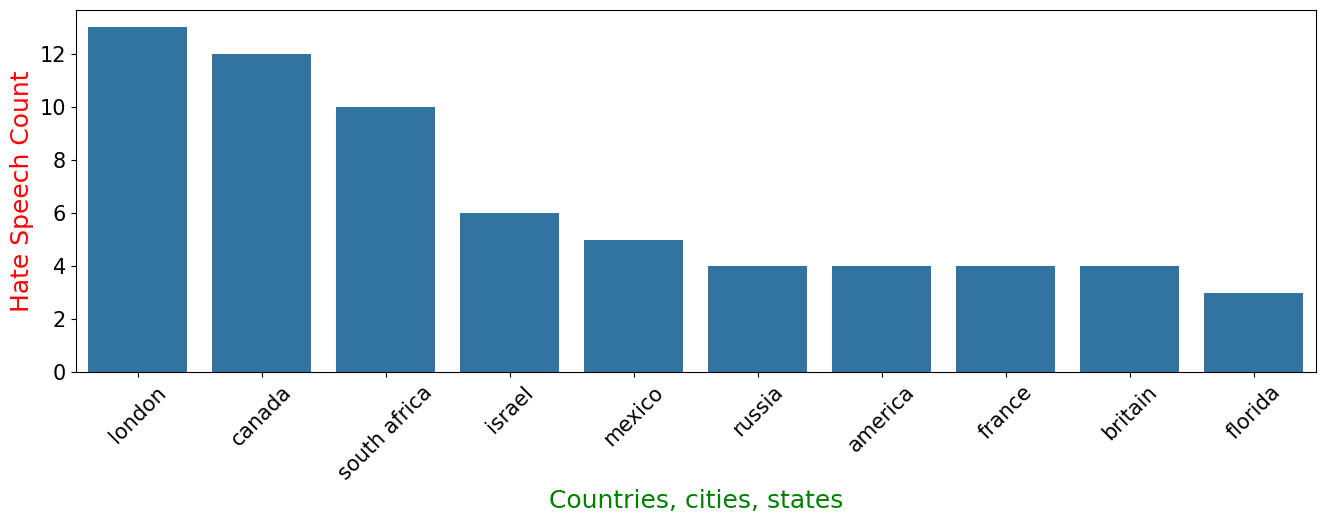

..............................................................................................................


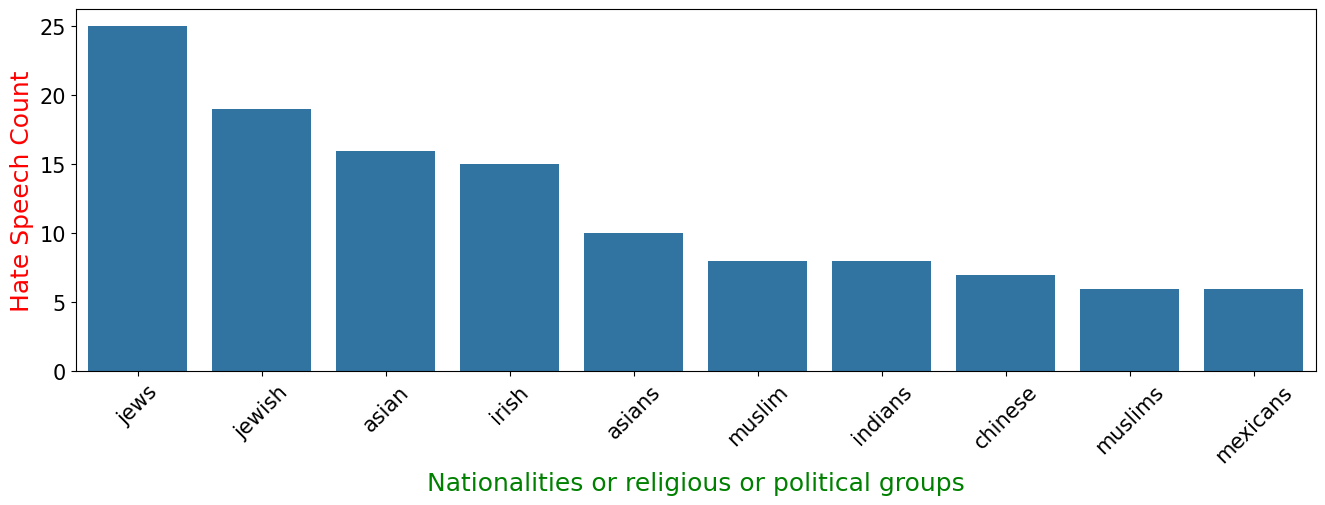

..............................................................................................................


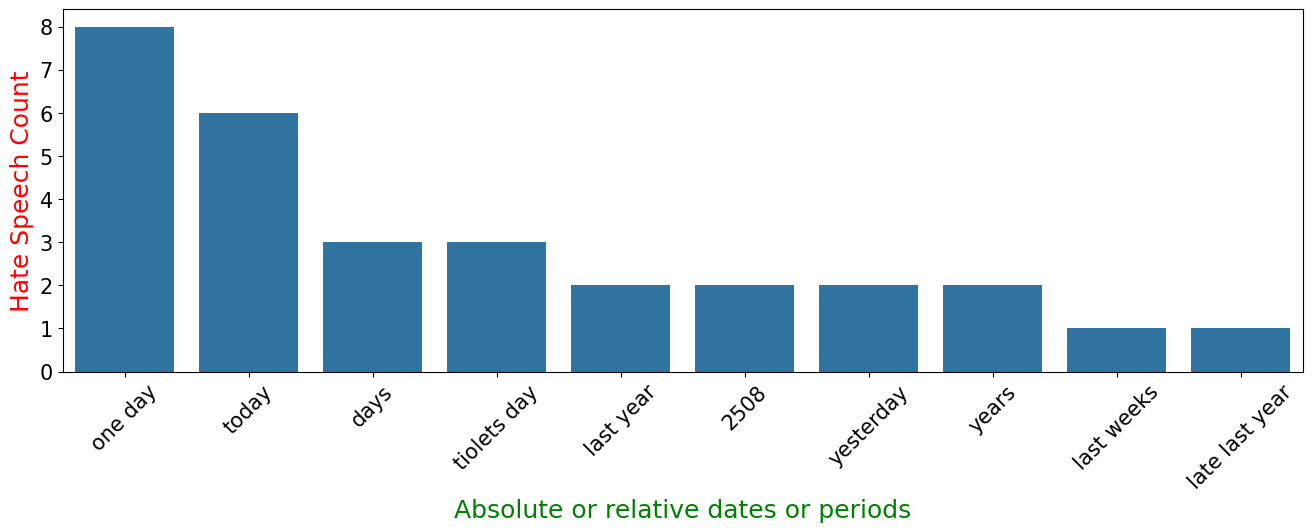

..............................................................................................................


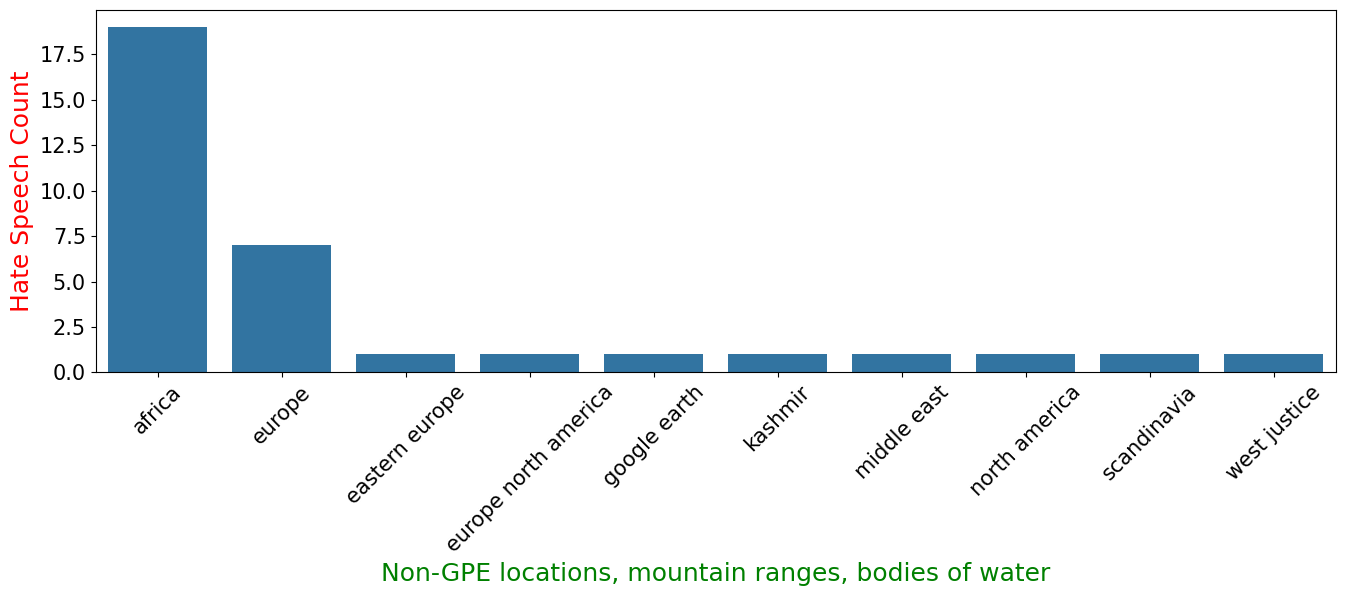

..............................................................................................................


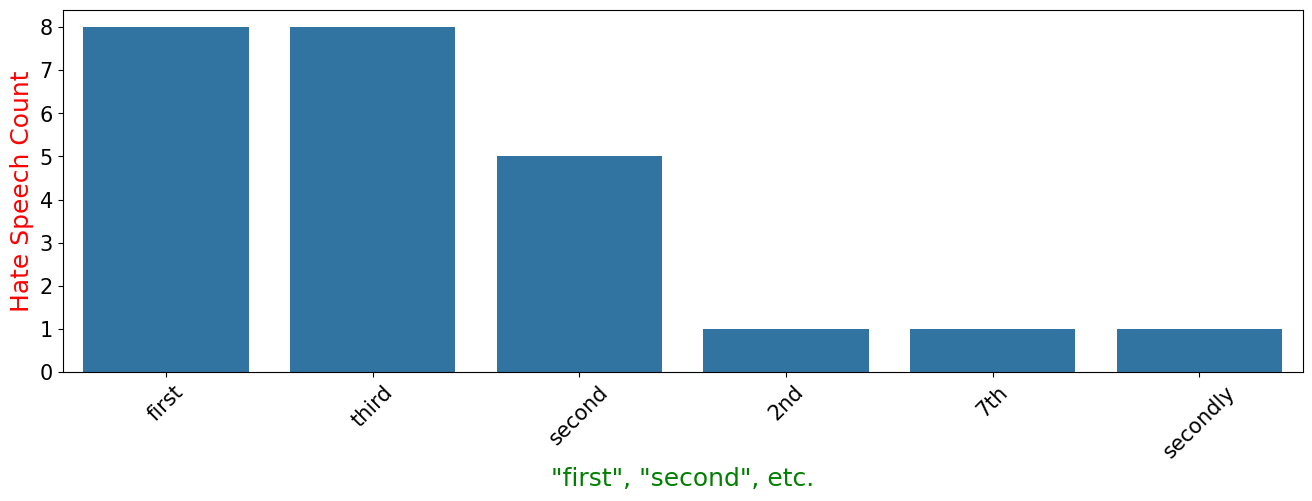

..............................................................................................................


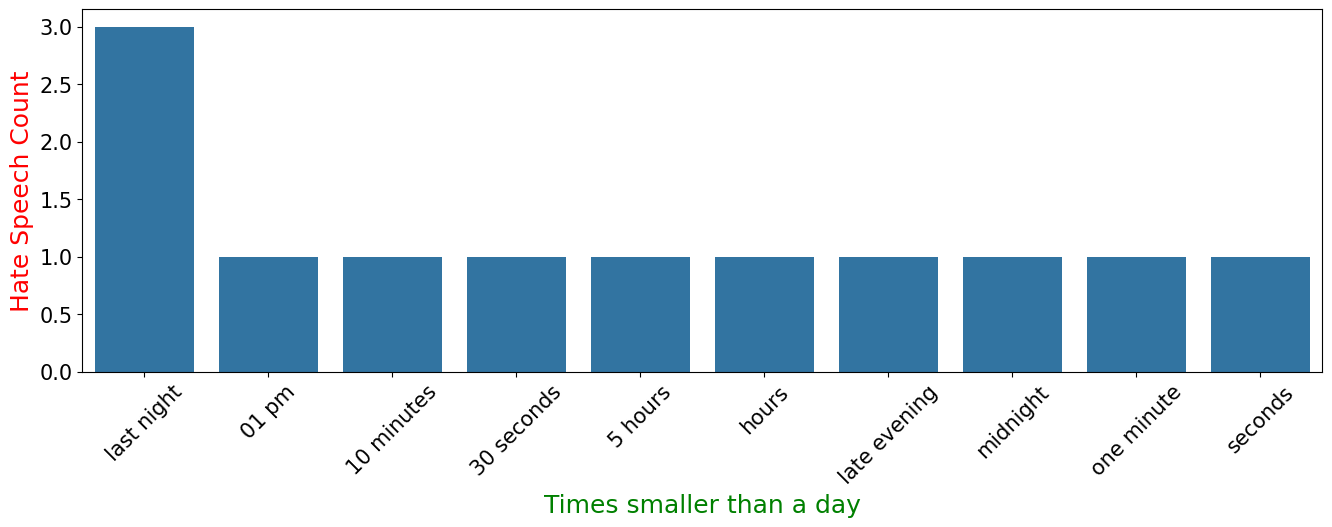

..............................................................................................................


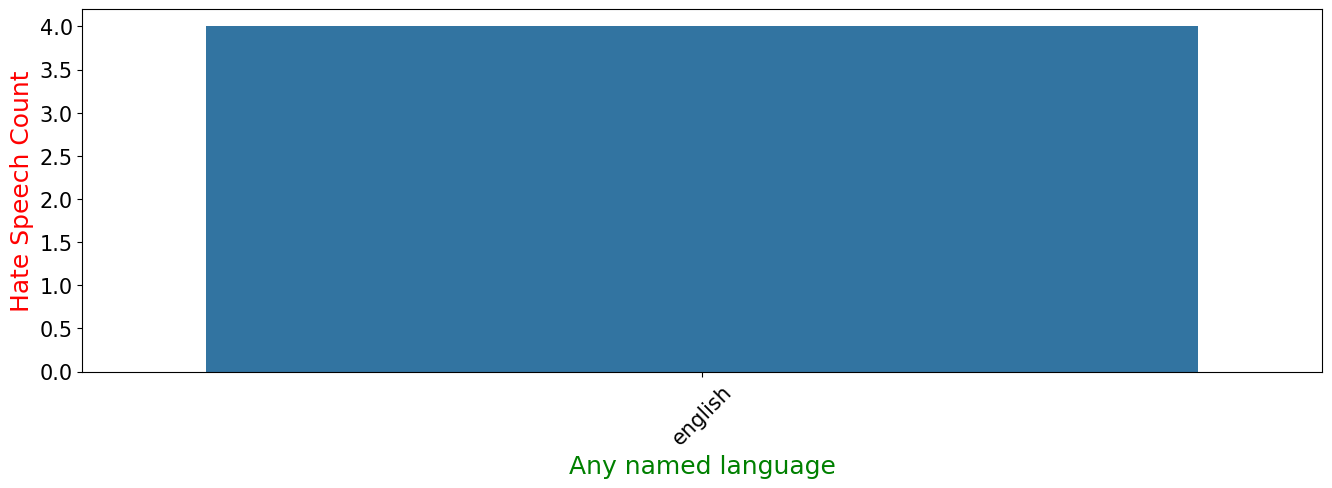

..............................................................................................................


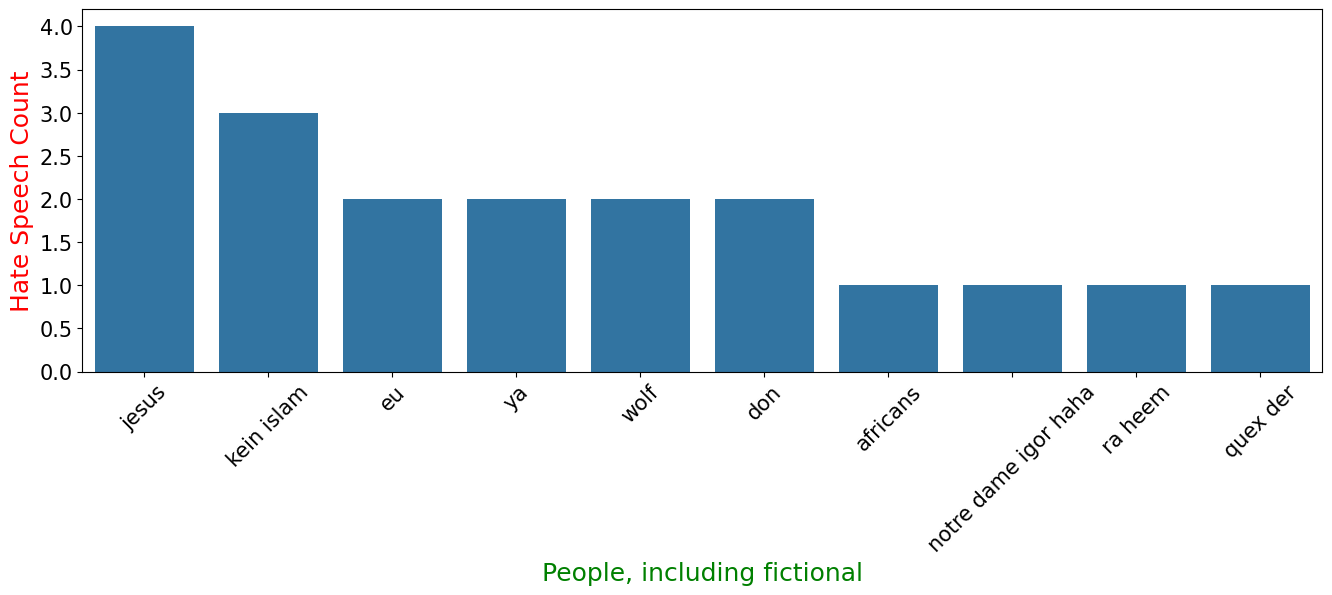

..............................................................................................................


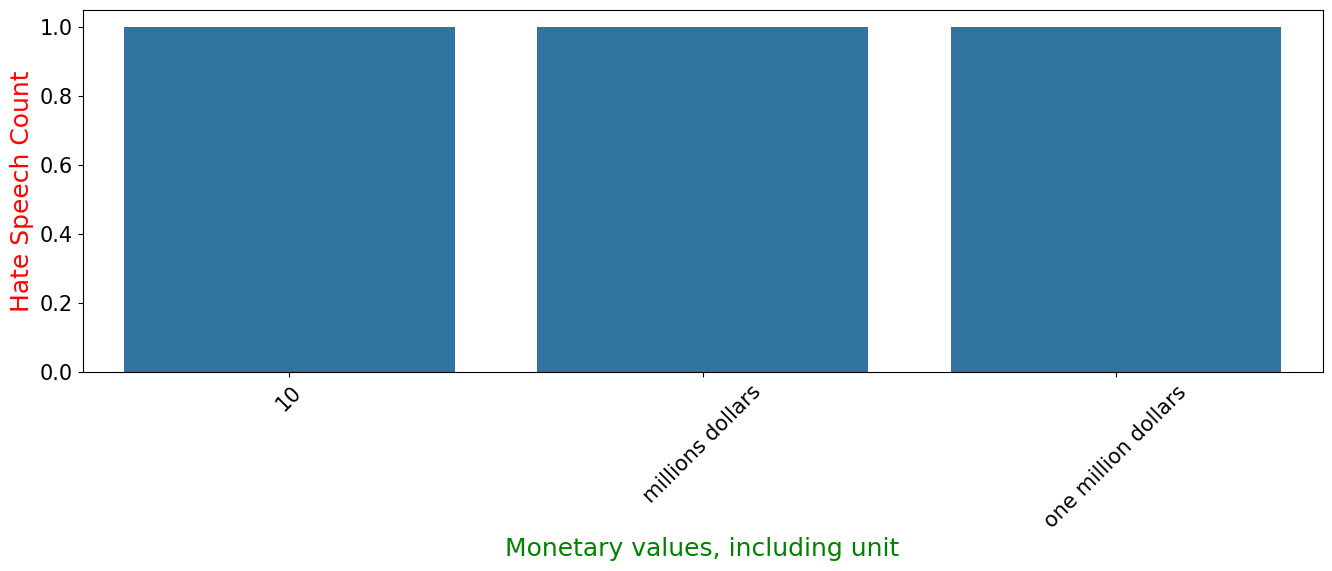

..............................................................................................................


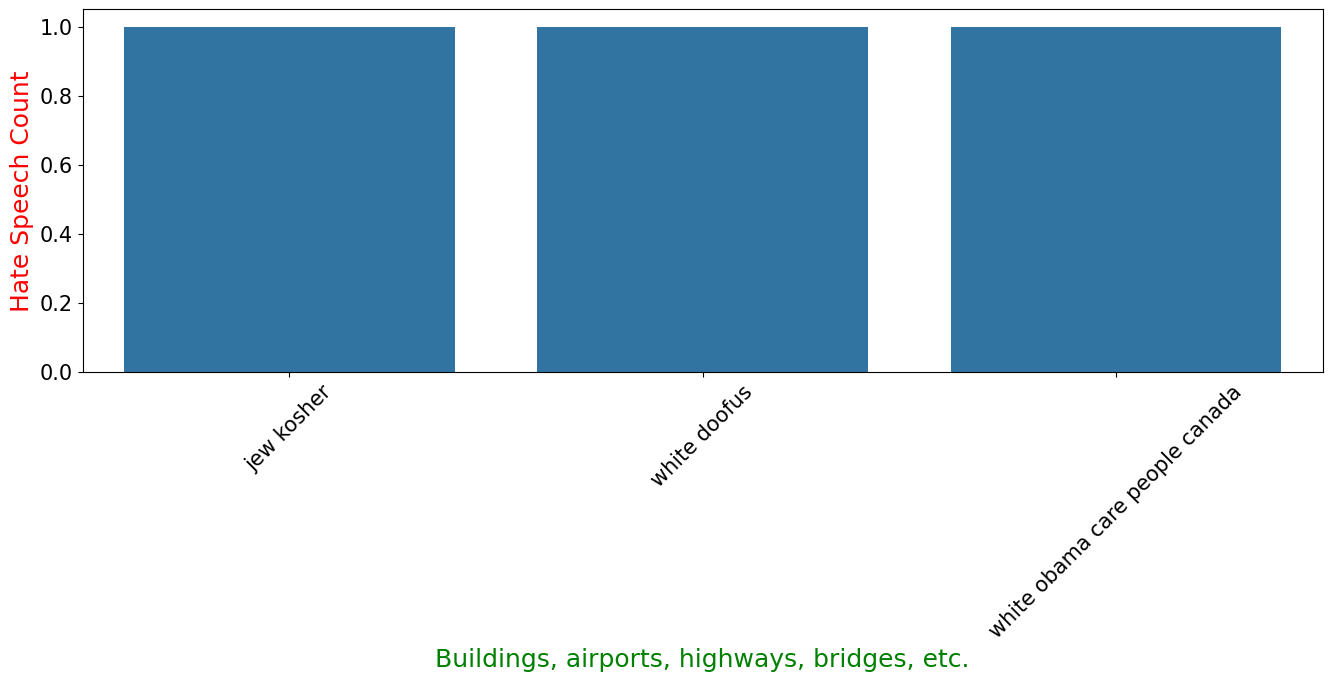

..............................................................................................................


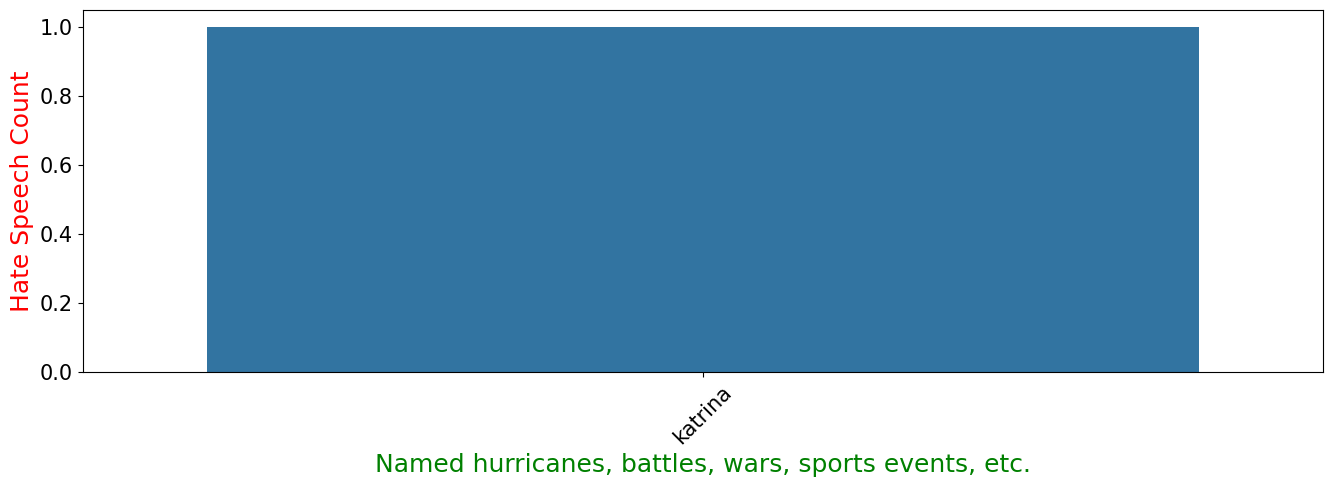

..............................................................................................................


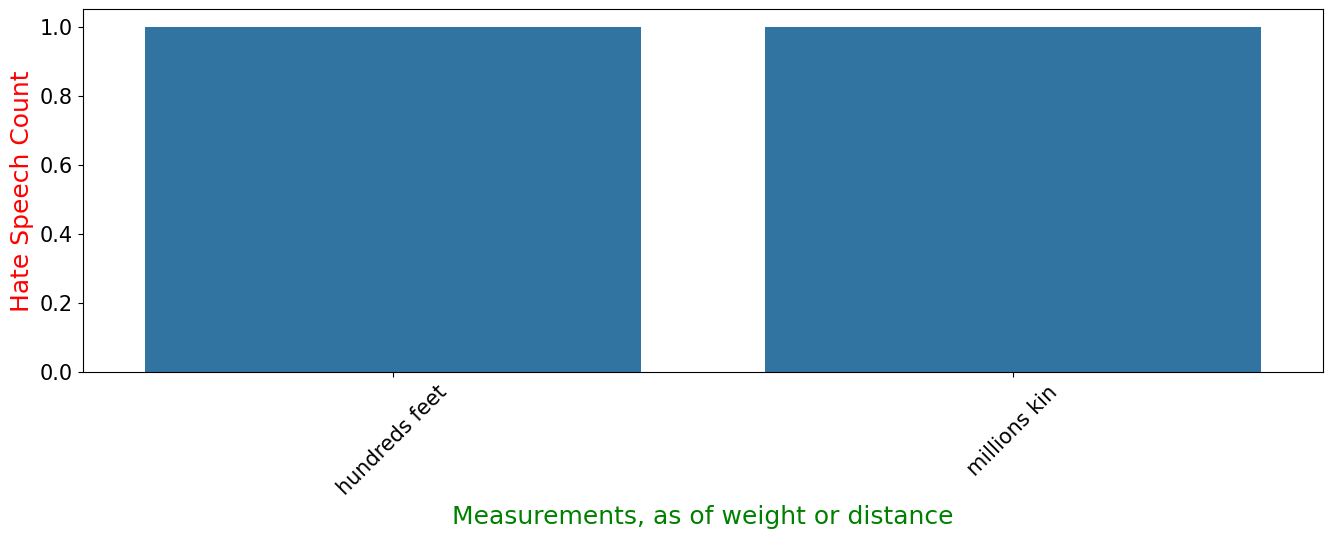

..............................................................................................................


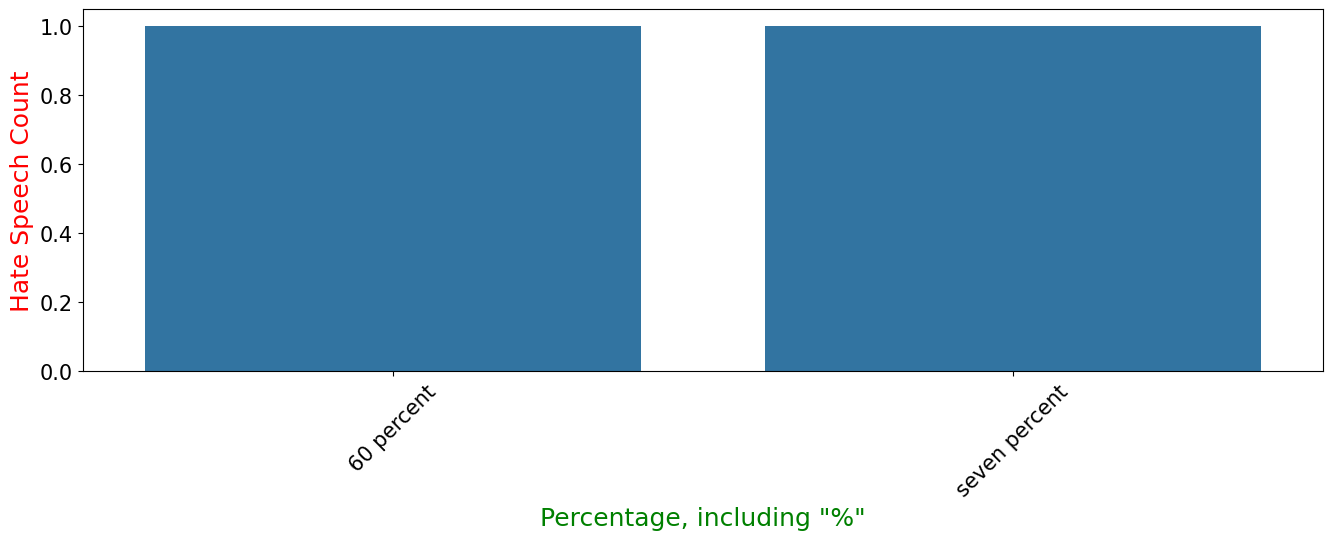

..............................................................................................................


In [45]:
for entity in list(ent_df['label'].unique()):
    plot(entity)

In [46]:
spacy.explain("NORP")

'Nationalities or religious or political groups'

In [47]:
#displacy.render(text1,style="ent",jupyter=True)

In [48]:
# a=[]
# for i in df_hate['corrected_text']:
#     if 'london'  in i.split() :
#         a.append(i)
# a

In [49]:
a=[]
for i in df_hate['corrected_text']:
    if 'jews'  in i.split() or 'jewish'  in i.split():
        a.append(i)
a

['jews have been poisoning wells since biblical times',
 'the jewish race is without any doubt the greatest threat to the survival of the white race',
 'i wonder why the jewish media always pretends that all the blood thirsty third world savages are victims and it is all whitey is fault',
 'i would not be surprised if this woman was specifically targeted by local jews from her town for this abominable treatment',
 'and most people will laugh and shake their head at you when you tell them that jews are a very dangerous group of people',
 'all the jews i have ever known will do anything for money  and all i can say is there are no good jews',
 'i think there is more threat from russians than from jews',
 'there are really few jews and millions of those bastards on the body of our country',
 'i would like to say and i can proudly say that there are no jews in iceland  those that tried to get here were all sent back to germany',
 'we will never give up  the jews can keep trying opening our

In [50]:
# a=[]
# for i in df_hate['corrected_text']:
#     if 'asian'  in i.split() or 'asians'  in i.split():
#         a.append(i)
# a

### Information Extraction Rule1: Rule on Noun-Verb-Noun Phrases
When you look at a sentence, it generally contains a subject (noun), action (verb), and an object (noun). The rest of the words are just there to give us additional information about the entities. Therefore, we can leverage this basic structure to extract the main bits of information from the sentence. Take for example the following sentence:
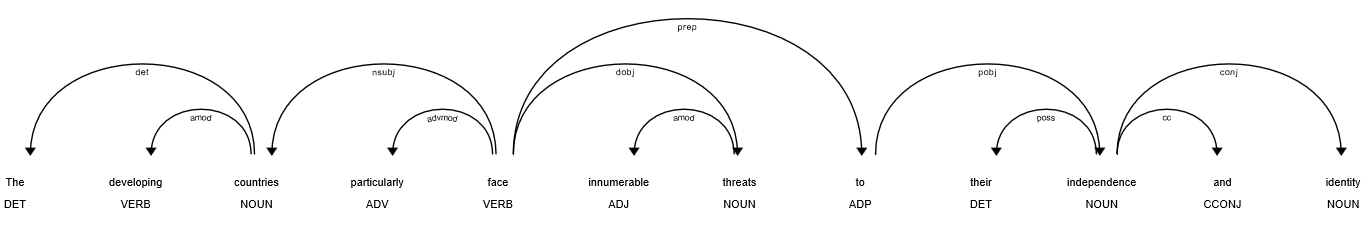
What will be extracted from this sample sentence based on the rule is – “countries face threats”. This should give us a fair idea about what the sentence is trying to say.

In [51]:
# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

# function to check output percentage for a rule
def output_per(df,out_col):
    
    result = 0
    
    for out in df[out_col]:
        if len(out)!=0:
            result+=1
    
    per = result/len(df)
    per *= 100
    
    return per


# function for rule 1: noun(subject), verb, noun(object)
def rule1(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        
        # if the token is a verb
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    
                    # add subject to the phrase
                    phrase += sub_tok.text

                    # save the root of the verb in phrase
                    phrase += ' '+token.lemma_ 

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        # save the object in the phrase
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                                    
                            phrase += ' '+sub_tok.text
                            sent.append(phrase)
            
    return sent


# create a df containing sentence and its output for rule 1
row_list = []

for i in range(len(a)):
    
#     sent = df3.loc[i,'Sent']
#     year = df3.loc[i,'Year']
    sent = a[i]
    output = rule1(sent)
    
    dict1 = {'Sent':sent,'Output':output}
    row_list.append(dict1)
    
df_rule1 = pd.DataFrame(row_list)

# rule 1 achieves 20% result on simple sentences
output_per(df_rule1,'Output')

23.75

In [52]:
df_rule1

,Sent,Output
0,jews have been poisoning wells since biblical ...,[jews poison wells]
1,the jewish race is without any doubt the great...,[]
2,i wonder why the jewish media always pretends ...,[]
3,i would not be surprised if this woman was spe...,[]
4,and most people will laugh and shake their hea...,[]
...,...,...
75,it should come as no surprise that the jews st...,[]
76,the problem is there is so many white liberal ...,[]
77,so the jews are gods chosen people and we are ...,[]
78,how can the jews be the same as god is people ...,[]


In [53]:
[(df_rule1['Sent'].iloc[idx],df_rule1['Output'].iloc[idx]) for idx,i in enumerate(df_rule1['Output']) if len(i)!=0]

[('jews have been poisoning wells since biblical times',
  ['jews poison wells']),
 ('does it surprise you that jews promote faggotry',
  ['jews promote faggotry']),
 ('i did could not realize we were offending you by pointing out how often asians and jews get surgery to look more white',
  ['asians get surgery']),
 ('i love it when jews get a taste of thier own vile medicene i hope each and every one of them young to old starve in the cold',
  ['jews get taste']),
 ('here is your logic  some whites are corrupt whores for jewish supremacists  therefore whites should not oppose jewish supremacist extermination of all whites and js efforts to control humanity is future',
  ['whites oppose extermination']),
 ('well i am sure that the jews have the cure for aids but they wont give it to the fags cause they already served their purpoise',
  ['jews have cure', 'they serve purpoise']),
 ('yeah maybe if you are jewish they just warm up the old money printing press when they might feel like the

In [54]:
# separate subject, verb and object

verb_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_rule1)):
    
    # sentence containing the output
    sentence = df_rule1.loc[i,'Sent']

    # output of the sentence
    output = df_rule1.loc[i,'Output']
    
    # iterating over all the outputs from the sentence
    for sent in output:
        
        # separate subject, verb and object
        n1, v, n2 = sent.split()[:1], sent.split()[1], sent.split()[2:]
        
        # append to list, along with the sentence
        dis_dict = {'Sent':sentence,'Noun1':n1,'Verb':v,'Noun2':n2}
        dis_list.append(dis_dict)
        
        # counting the number of sentences containing the verb
        verb = sent.split()[1]
        if verb in verb_dict:
            verb_dict[verb]+=1
        else:
            verb_dict[verb]=1

df_sep = pd.DataFrame(dis_list)

In [55]:
df_sep

,Sent,Noun1,Verb,Noun2
0,jews have been poisoning wells since biblical ...,[jews],poison,[wells]
1,does it surprise you that jews promote faggotry,[jews],promote,[faggotry]
2,i did could not realize we were offending you ...,[asians],get,[surgery]
3,i love it when jews get a taste of thier own v...,[jews],get,[taste]
4,here is your logic some whites are corrupt wh...,[whites],oppose,[extermination]
5,well i am sure that the jews have the cure for...,[jews],have,[cure]
6,well i am sure that the jews have the cure for...,[they],serve,[purpoise]
7,yeah maybe if you are jewish they just warm up...,[they],warm,[press]
8,the jews had the romans murder jesus for them ...,[romans],murder,[jesus]
9,this might take the cake of the biggest load o...,[this],take,[cake]


### Information Extraction Rule2 – Rule on Adjective Noun Structure
In the previous rule that we made for information extraction in NLP, we extracted the noun subjects and objects, but the information did not feel complete. This is because many nouns have an adjective or a word with a compound dependency that augments the meaning of a noun. Extracting these along with the noun will give us better information about the subject and the object.

Have a look at the sample sentence below:
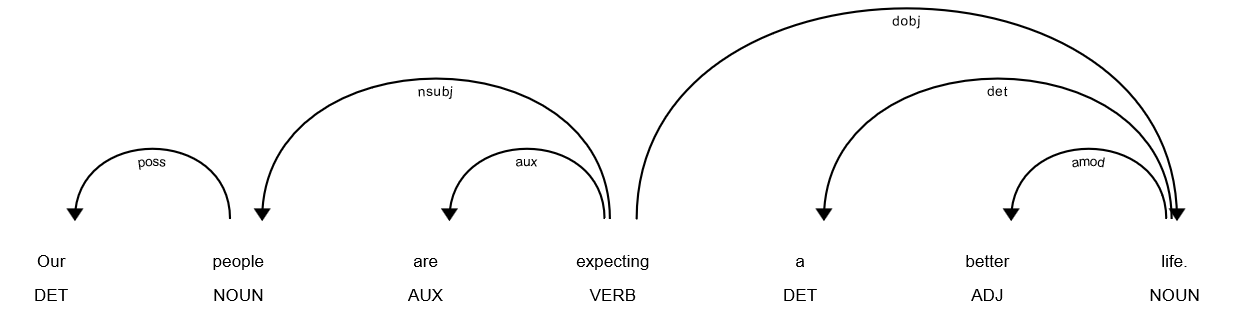
What we are looking to achieve here is – “better life”.

The code for this rule is simple, but let me walk you through how it works:

We look for tokens that have a Noun POS tag and have subject or object dependency
Then we look at the child nodes of these tokens and append it to the phrase only if it modifies the noun

In [56]:
# function for rule 2
def rule2(text):
    
    doc = nlp(text) 

    pat = []
    
    # iterate over tokens
    for token in doc:
        phrase = ''
        # if the word is a subject noun or an object noun
        if (token.pos_ == 'NOUN')\
            and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective or has a compound dependency
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
                    
            if len(phrase)!=0:
                phrase += token.text
             
        if  len(phrase)!=0:
            pat.append(phrase)
        
    
    return pat

In [57]:
# create a df containing sentence and its output for rule 2
row_list = []

for i in range(len(a)):
    
    sent = a[i]

    # rule
    output = rule2(sent)
    
    dict1 = {'Sent':sent,'Output':output}
    row_list.append(dict1)

df_rule2 = pd.DataFrame(row_list)

In [58]:
df_rule2

,Sent,Output
0,jews have been poisoning wells since biblical ...,[biblical times]
1,the jewish race is without any doubt the great...,"[jewish race, white race]"
2,i wonder why the jewish media always pretends ...,"[jewish media, thirsty third world savages]"
3,i would not be surprised if this woman was spe...,[abominable treatment]
4,and most people will laugh and shake their hea...,[most people]
...,...,...
75,it should come as no surprise that the jews st...,[]
76,the problem is there is so many white liberal ...,[same side]
77,so the jews are gods chosen people and we are ...,[]
78,how can the jews be the same as god is people ...,[]


In [59]:
def rule2_mod(text,index):
    
    doc = nlp(text)

    phrase = ''
    
    for token in doc:
        
        if token.i == index:
            
            for subtoken in token.children:
                if (subtoken.pos_ == 'ADJ'):
                    phrase += ' '+subtoken.text
            break
    
    return phrase

In [60]:
def rule1_mod(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        # root word
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    
                    # look for subject modifier
                    adj = rule2_mod(text,sub_tok.i)
                    
                    phrase += adj + ' ' + sub_tok.text

                    # save the root word of the word
                    phrase += ' '+token.lemma_ 

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                            
                            # look for object modifier
                            adj = rule2_mod(text,sub_tok.i)
                            
                            phrase += adj+' '+sub_tok.text
                            sent.append(phrase)
            
    return sent

In [61]:
# create a df containing sentence and its output for modified rule 1
row_list = []

# df2 contains all the sentences from all the speeches
for i in range(len(a)):
    
    sent = a[i]
    output = rule1_mod(sent)
    dict1 = {'Sent':sent,'Output':output}
    row_list.append(dict1)
    
df_rule1_mod_all = pd.DataFrame(row_list)
# check rule1 output on complete speeches
output_per(df_rule1_mod_all,'Output')

23.75

In [62]:
[(df_rule1_mod_all['Sent'].iloc[idx],df_rule1_mod_all['Output'].iloc[idx]) for idx,i in enumerate(df_rule1_mod_all['Output']) if len(i)!=0]

[('jews have been poisoning wells since biblical times',
  [' jews poison wells']),
 ('does it surprise you that jews promote faggotry',
  [' jews promote faggotry']),
 ('i did could not realize we were offending you by pointing out how often asians and jews get surgery to look more white',
  [' asians get surgery']),
 ('i love it when jews get a taste of thier own vile medicene i hope each and every one of them young to old starve in the cold',
  [' jews get taste']),
 ('here is your logic  some whites are corrupt whores for jewish supremacists  therefore whites should not oppose jewish supremacist extermination of all whites and js efforts to control humanity is future',
  [' whites oppose jewish extermination']),
 ('well i am sure that the jews have the cure for aids but they wont give it to the fags cause they already served their purpoise',
  [' jews have cure', ' they serve purpoise']),
 ('yeah maybe if you are jewish they just warm up the old money printing press when they might

### Information Extraction Rule3 – Rule on Prepositions
Thank god for prepositions! They tell us where or when something is in a relationship with something else. For example, The people of India believe in the principles of the United Nations. Clearly extracting phrases including prepositions will give us a lot of information from the sentence. This is exactly what we are going to achieve with this rule.

Let’s try to understand how this rule works by going over it on a sample sentence – “India has once again shown faith in democracy.”

We iterate over all the tokens looking for prepositions. For example, in this sentence
On encountering a preposition, we check if it has a headword that is a noun. For example, the word faith in this sentence
Then we look at the child tokens of the preposition token falling on its right side. For example, the word democracy
This should finally extract the phrase faith in democracy from the sentence. Have a look at the dependency graph of the sentence below:
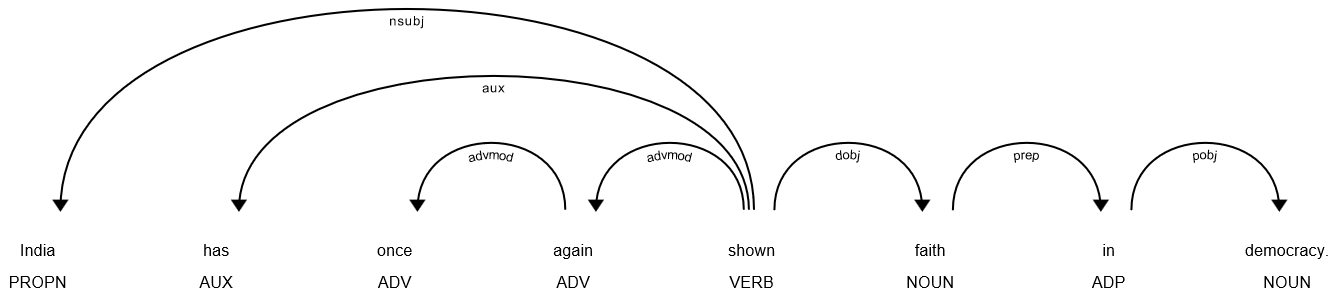

In [63]:
# rule 3 function
def rule3(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:

        # look for prepositions
        if token.pos_=='ADP':

            phrase = ''
            
            # if its head word is a noun
            if token.head.pos_=='NOUN':
                
                # append noun and preposition to phrase
                phrase += token.head.text
                phrase += ' '+token.text

                # check the nodes to the right of the preposition
                for right_tok in token.rights:
                    # append if it is a noun or proper noun
                    if (right_tok.pos_ in ['NOUN','PROPN']):
                        phrase += ' '+right_tok.text
                
                if len(phrase)>2:
                    sent.append(phrase)
                
    return sent

In [64]:
row_list = []

for i in range(len(a)):
    
    sent = a[i]
    
    
    # rule
    output = rule3(sent)
    
    dict1 = dict1 = {'Sent':sent,'Output':output}
    row_list.append(dict1)

df_rule3 = pd.DataFrame(row_list)
# output percentage for rule 3
output_per(df_rule3,'Output')

43.75

In [65]:
df_rule3

,Sent,Output
0,jews have been poisoning wells since biblical ...,[]
1,the jewish race is without any doubt the great...,"[threat to survival, survival of race]"
2,i wonder why the jewish media always pretends ...,[]
3,i would not be surprised if this woman was spe...,[]
4,and most people will laugh and shake their hea...,[group of people]
...,...,...
75,it should come as no surprise that the jews st...,[]
76,the problem is there is so many white liberal ...,[side as jews]
77,so the jews are gods chosen people and we are ...,[]
78,how can the jews be the same as god is people ...,[]


In [66]:
[(df_rule3['Sent'].iloc[idx],df_rule3['Output'].iloc[idx]) for idx,i in enumerate(df_rule3['Output']) if len(i)!=0]

[('the jewish race is without any doubt the greatest threat to the survival of the white race',
  ['threat to survival', 'survival of race']),
 ('and most people will laugh and shake their head at you when you tell them that jews are a very dangerous group of people',
  ['group of people']),
 ('i think there is more threat from russians than from jews',
  ['threat from russians', 'threat than']),
 ('there are really few jews and millions of those bastards on the body of our country',
  ['millions of bastards', 'body of country']),
 ('a puppet in the hands of the jews were zionist jewish states of america and the bolshevik soviet union',
  ['puppet in hands', 'hands of jews', 'states of america']),
 ('not good news at all but this happens in all european nations and is no doubt pushed by the likes of jews like summer redstone and mtv',
  ['likes of jews']),
 ('yeah but what you have to remember is that the jews are cunning and would probz slither their way out of it and justify their ri

In [67]:
# separate noun, preposition and noun

prep_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_rule3)):
    
    # sentence containing the output
    sentence = df_rule3.loc[i,'Sent']
    
    # output of the sentence
    output = df_rule3.loc[i,'Output']
    
    # iterating over all the outputs from the sentence
    for sent in output:
        
        # separate subject, verb and object
        n1, p, n2 = sent.split()[0], sent.split()[1], sent.split()[2:]
        
        # append to list, along with the sentence
        dis_dict = {'Sent':sentence,'Noun1':n1,'Preposition':p,'Noun2':n2}
        dis_list.append(dis_dict)
        
        # counting the number of sentences containing the verb
        prep = sent.split()[1]
        if prep in prep_dict:
            prep_dict[prep]+=1
        else:
            prep_dict[prep]=1

df_sep3= pd.DataFrame(dis_list)


In [68]:
df_sep3

,Sent,Noun1,Preposition,Noun2
0,the jewish race is without any doubt the great...,threat,to,[survival]
1,the jewish race is without any doubt the great...,survival,of,[race]
2,and most people will laugh and shake their hea...,group,of,[people]
3,i think there is more threat from russians tha...,threat,from,[russians]
4,i think there is more threat from russians tha...,threat,than,[]
5,there are really few jews and millions of thos...,millions,of,[bastards]
6,there are really few jews and millions of thos...,body,of,[country]
7,a puppet in the hands of the jews were zionist...,puppet,in,[hands]
8,a puppet in the hands of the jews were zionist...,hands,of,[jews]
9,a puppet in the hands of the jews were zionist...,states,of,[america]


In [69]:
# rule 0
def rule0(text, index):
    
    doc = nlp(text)
        
    token = doc[index]
    
    entity = ''
    
    for sub_tok in token.children:
        if (sub_tok.dep_ in ['compound','amod']):
            entity += sub_tok.text+' '
    
    entity += token.text

    return entity

In [70]:
# rule 3 function
def rule3_mod(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:

        if token.pos_=='ADP':

            phrase = ''
            if token.head.pos_=='NOUN':
                
                # appended rule
                append = rule0(text, token.head.i)
                if len(append)!=0:
                    phrase += append
                else:  
                    phrase += token.head.text
                phrase += ' '+token.text

                for right_tok in token.rights:
                    if (right_tok.pos_ in ['NOUN','PROPN']):
                        
                        right_phrase = ''
                        # appended rule
                        append = rule0(text, right_tok.i)
                        if len(append)!=0:
                            right_phrase += ' '+append
                        else:
                            right_phrase += ' '+right_tok.text
                            
                        phrase += right_phrase
                
                if len(phrase)>2:
                    sent.append(phrase)
                

    return sent

In [71]:
row_list = []

for i in range(len(a)):
    
    sent = a[i]
    
    
    # rule
    output = rule3_mod(sent)
    
    dict1 = dict1 = {'Sent':sent,'Output':output}
    row_list.append(dict1)

df_rule3_mod = pd.DataFrame(row_list)
# output percentage for rule 3
output_per(df_rule3_mod,'Output')

43.75

In [72]:
df_rule3_mod

,Sent,Output
0,jews have been poisoning wells since biblical ...,[]
1,the jewish race is without any doubt the great...,"[greatest threat to survival, survival of whit..."
2,i wonder why the jewish media always pretends ...,[]
3,i would not be surprised if this woman was spe...,[]
4,and most people will laugh and shake their hea...,[dangerous group of people]
...,...,...
75,it should come as no surprise that the jews st...,[]
76,the problem is there is so many white liberal ...,[same side as jews]
77,so the jews are gods chosen people and we are ...,[]
78,how can the jews be the same as god is people ...,[]


In [73]:
[(df_rule3_mod['Sent'].iloc[idx],df_rule3_mod['Output'].iloc[idx]) for idx,i in enumerate(df_rule3_mod['Output']) if len(i)!=0]

[('the jewish race is without any doubt the greatest threat to the survival of the white race',
  ['greatest threat to survival', 'survival of white race']),
 ('and most people will laugh and shake their head at you when you tell them that jews are a very dangerous group of people',
  ['dangerous group of people']),
 ('i think there is more threat from russians than from jews',
  ['more threat from russians', 'more threat than']),
 ('there are really few jews and millions of those bastards on the body of our country',
  ['millions of bastards', 'body of country']),
 ('a puppet in the hands of the jews were zionist jewish states of america and the bolshevik soviet union',
  ['puppet in hands', 'hands of jews', 'zionist jewish states of america']),
 ('not good news at all but this happens in all european nations and is no doubt pushed by the likes of jews like summer redstone and mtv',
  ['likes of jews']),
 ('yeah but what you have to remember is that the jews are cunning and would prob